# BIOMASS PRODUCT COMPARISON : COUNTRY SUMMARIES ### 

#### LOAD PACKAGES ###
###### NOTE: If installtion fails, try :  ## conda activate r-with-gdal    ##   conda install -c conda-forge r-ff 

In [1]:
# conda install -y --solver=libmamba -c conda-forge gdal=3.6.2
# conda env update -n base --file /projects/my-public-bucket/_ENV/env/r_env.yml

packages <- c("raster", "rgdal", "rgeos", "geosphere","RColorBrewer","gdalUtils","jpeg","plyr","maptools", "scales", "sf","aws.s3","aws.ec2metadata")
package.check <- lapply(packages, FUN = function(x) {
    if (!require(x, character.only = TRUE)) {
        # install.packages(x, dependencies = TRUE)
        library(x, character.only = TRUE, quietly=TRUE)
    }
})
Sys.setenv("AWS_DEFAULT_REGION" = 'us-west-2')

Loading required package: raster

Loading required package: sp

Loading required package: rgdal

Please note that rgdal will be retired during 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.
See https://r-spatial.org/r/2022/04/12/evolution.html and https://github.com/r-spatial/evolution
rgdal: version: 1.6-6, (SVN revision 1201)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.6.2, released 2023/01/02
Path to GDAL shared files: 
 GDAL does not use iconv for recoding strings.
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 9.1.0, September 1st, 2022, [PJ_VERSION: 910]
Path to PROJ shared files: /projects/.local/share/proj:/opt/conda/share/proj
PROJ CDN enabled: TRUE
Linking to sp version:1.6-0
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading sp or rgdal.

Loading required package: rgeo

#### LINK TO PRE-DEFINED FUNCTIONS ###

In [2]:
source_link <-'/projects/ADE_biomass_harmonization/biomass_harmonization/NASA_CMS_2023/Country_summaries_functions.R'
source(source_link)

#### LIST OF AVAILABLE COUNTRY BOUNDARIES ###

In [3]:
Cont <- readOGR("/projects/my-public-bucket/Data/NASA_CMS_2023/MEXICO/TEST.shp")
Cont$ne_10m_adm <- "Selvas Calido Humedas"
Cont$ne_10m_a_1 <- "SCH"
Cont$ne_10m_a_2 <- "North America"
Cont$Evaluate <- "Y"
Cont$Eval_ISB <- "N"
Country_list <- cbind(data.frame(Cont$ne_10m_adm), data.frame(Cont$ne_10m_a_1), data.frame(Cont$ne_10m_a_2), data.frame(Cont$Evaluate), data.frame(Cont$Eval_ISB))
colnames(Country_list) <- c('Country',"CODE", "Continent","Evaluate","Eval_ISB")

### BIG COUNTRIES SPLIT #######
BIG_countries <- FALSE
if (BIG_countries == TRUE) {
    Cont <- readOGR("/projects/my-private-bucket/Big_countries/AUS_BRA_CHI_USA.shp")
    Country_list <- cbind(data.frame(Cont$ADMIN), data.frame(Cont$ADM0_A3), data.frame(Cont$CONTINENT))
    colnames(Country_list) <- c('Country',"CODE", "Continent") 
} 

Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”


OGR data source with driver: ESRI Shapefile 
Source: "/projects/my-public-bucket/Data/NASA_CMS_2023/MEXICO/TEST.shp", layer: "TEST"
with 1 features
It has 15 fields


###  -------------------------------------------------------
###  !!!!!!!!! DATA AND ANALYSIS QUESTIONAIRE FOR USER 
###  --------------------------------------------------------

In [4]:
iso3 <- c("SCH") # c("PRY") 

In [5]:
Base_folder = '/projects/Country_OUTPUTS' 

################# Create necessary subfolders for outputs #####################################
if (!dir.exists(Base_folder)){dir.create(Base_folder)}
Out_folder = file.path(Base_folder,iso3)
if (!dir.exists(Out_folder)){dir.create(Out_folder)}
if (dir.exists(Out_folder)){dir.create(file.path(Out_folder,paste0(iso3,'_Product_Comparisons')))}
if (dir.exists(Out_folder)){dir.create(file.path(Out_folder,paste0(iso3,'_Product_AOI')))}
if (dir.exists(Out_folder)){dir.create(file.path(Out_folder,paste0(iso3,'_Product_FMASK')))}

Warning message in dir.create(file.path(Out_folder, paste0(iso3, "_Product_Comparisons"))):
“'/projects/Country_OUTPUTS/SCH/SCH_Product_Comparisons' already exists”
Warning message in dir.create(file.path(Out_folder, paste0(iso3, "_Product_AOI"))):
“'/projects/Country_OUTPUTS/SCH/SCH_Product_AOI' already exists”
Warning message in dir.create(file.path(Out_folder, paste0(iso3, "_Product_FMASK"))):
“'/projects/Country_OUTPUTS/SCH/SCH_Product_FMASK' already exists”


##### Set the maps that need to be compared and the versions/date

In [6]:
maps <- c('CCI','GEDI','JPL','MEX_AGB') # List the maps for which a comparison is to be done ,'NCEO','JPL'

##### Set the years and versions of the biomass maps to be used 

In [7]:
if (is.element('CCI', maps)){CCI_year = '2020'
                             CCI_version = 4}
if (is.element('JPL', maps)){JPL_year = '2020'}
if (is.element('GEDI', maps)){GEDI_year = '2020'}
if (is.element('MEX_AGB', maps)){MEX_AGB_year = '2020'}

##### Set source folders of biomass maps - needs to be improved, all maps should be in one location? 

In [8]:
if (is.element('CCI', maps)){cci_folder <- paste0('/projects/my-private-bucket/Data/CCI_2020')}
if (is.element('JPL', maps)){jpl_folder <- "/projects/shared-buckets/sfavrichon"}
if (is.element('GEDI', maps)){gedi_folder <- "/projects/shared-buckets/nehajo88/Data/Biomass_maps/GEDI_L4B_v21/"}
if (is.element('MEX_AGB', maps)){mex_agb_folder <- "/projects/shared-buckets/nehajo88/Data/Biomass_maps/MEX_NFI_AGB"}

##### Set how forest/non-forest areas should be treated 
#####  - (External = An external datasource (e.g. Hansen, ALOS, Sentinel, or country-provided map) is used to mask out pixels in all maps)
#####  - (None = no forest mask is applied, maps are treated just as they are provided)

In [9]:
forest_mask <- c('None') # c('External') or c('None') 
if (forest_mask == c('None')) {Default_FMASK = FALSE}
if (forest_mask == c('External')) {
    Default_FMASK = TRUE #set to true if no external mask is available. Default uses 2020 Hansen Tree Cover in units of %. 
    if (Default_FMASK){
        print("Hansen 2020 tree cover % to be used as an FMASK")
        EMask_folder <- "/projects/shared-buckets/leitoldv/gfc_data" # Source folder for original Hansen 2020 TC maps 
        HOut_folder <- "/projects/my-public-bucket/Biomass_Harmonization_OUTPUTS/HANSEN_TC2020" # Output folder for processed Hansen 2020 TC maps 
        if (!dir.exists(HOut_folder)){dir.create(HOut_folder)}
        EMask_file <- paste0("HANSEN_TC2020_",iso3,".tif") # Name of output file for Hansen 2020 TC map for country of interest  
        non_forest_value <- 10
        resample_method <- "bilinear" 
    }
    if (!Default_FMASK){
        print("External FMASK is provided by user")
        print(paste("Please refer to",source_link,"to adjust for parameters of the countr-specific forest mask"))
    }
}

#### GENERATE A GRID FOR CCI AND HANSEN LAYERS (do not remove even if CCI and HANSEN are not used)  

In [10]:
comparison_grid <- c('CCI')
Grid_tiles <- Grid_set(maps=comparison_grid)

Warning message in CPL_crs_from_input(x):
“GDAL Message 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order.”


###  --------------------------------------------------------
###  !!!!!!!!! START ANALYSIS !!!!!!! ### 
###  --------------------------------------------------------

### DISPLAY COUNTRY OF INTEREST AND TILES 

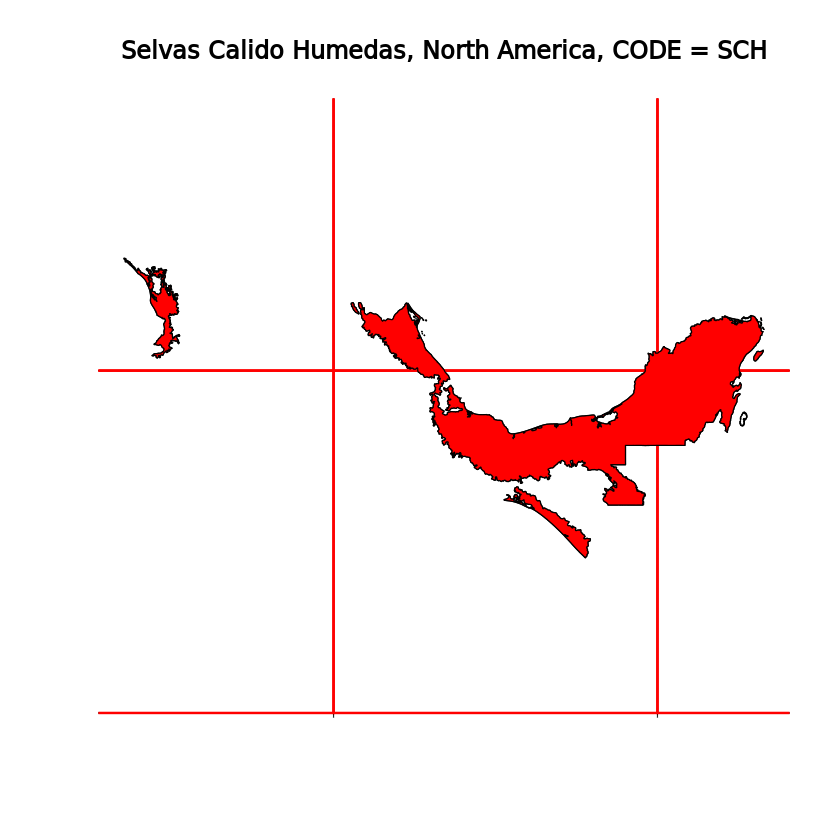

In [11]:
# Cont <- Cont[Cont$CONTINENT==Country_list$Continent[Country_list$CODE == iso3],]
Cont$ADM0_A3 <- Country_list$CODE
conti <- Country_list$Continent[Country_list$CODE == iso3]
if (conti=="South America"){conti = "SAmerica"}
if (conti=="North America"){conti = "NAmerica"}
if (conti=="Seven seas (open ocean)" & (iso3=="MDV" | iso3=='MUS' | iso3=='SYC')){conti = "Africa"}
if (conti=="Asia" & (iso3=="TLS" | iso3=='MUS' | iso3=='SYC')){conti = "Oceania"}
aoi <- Cont[Cont$ADM0_A3 == iso3,]
AOI_file = file.path(Out_folder,paste0(iso3,'_aoi.shp'))
if (!file.exists(AOI_file)) {writeOGR(obj=aoi, dsn=Out_folder, layer=paste0(iso3,'_aoi'), driver="ESRI Shapefile")}
if (!identical(crs(aoi), crs(Grid_tiles))){aoi <- spTransform(aoi, crs(Grid_tiles))}
intersecting <- as.logical(gIntersects(Grid_tiles, gConvexHull(aoi), byid=TRUE) & !gTouches(Grid_tiles, gConvexHull(aoi), byid=TRUE))
if (sum(intersecting) == 0) {
    stop('no intersecting CCI Biomass tiles found')
  } else {tiles <- Grid_tiles[intersecting,]}
aoi <- spTransform(aoi, crs(tiles)) # Transform aoi to match tiles CRS so it can be used later for cropping
plot(Cont, col="gray", main=paste0(Country_list$Country[Country_list$CODE == iso3],', ',Country_list$Continent[Country_list$CODE == iso3],', CODE = ',iso3))
plot(Grid_tiles, lty=2, add=T)
plot(tiles, lwd=2, border="red", add=T)
plot(aoi, col="red", add=T)

### READ BIOMASS MAPS, PREPARE AOI_MASKED DATA AND PLOTS

##### (original maps and histograms, no resampling done here!)

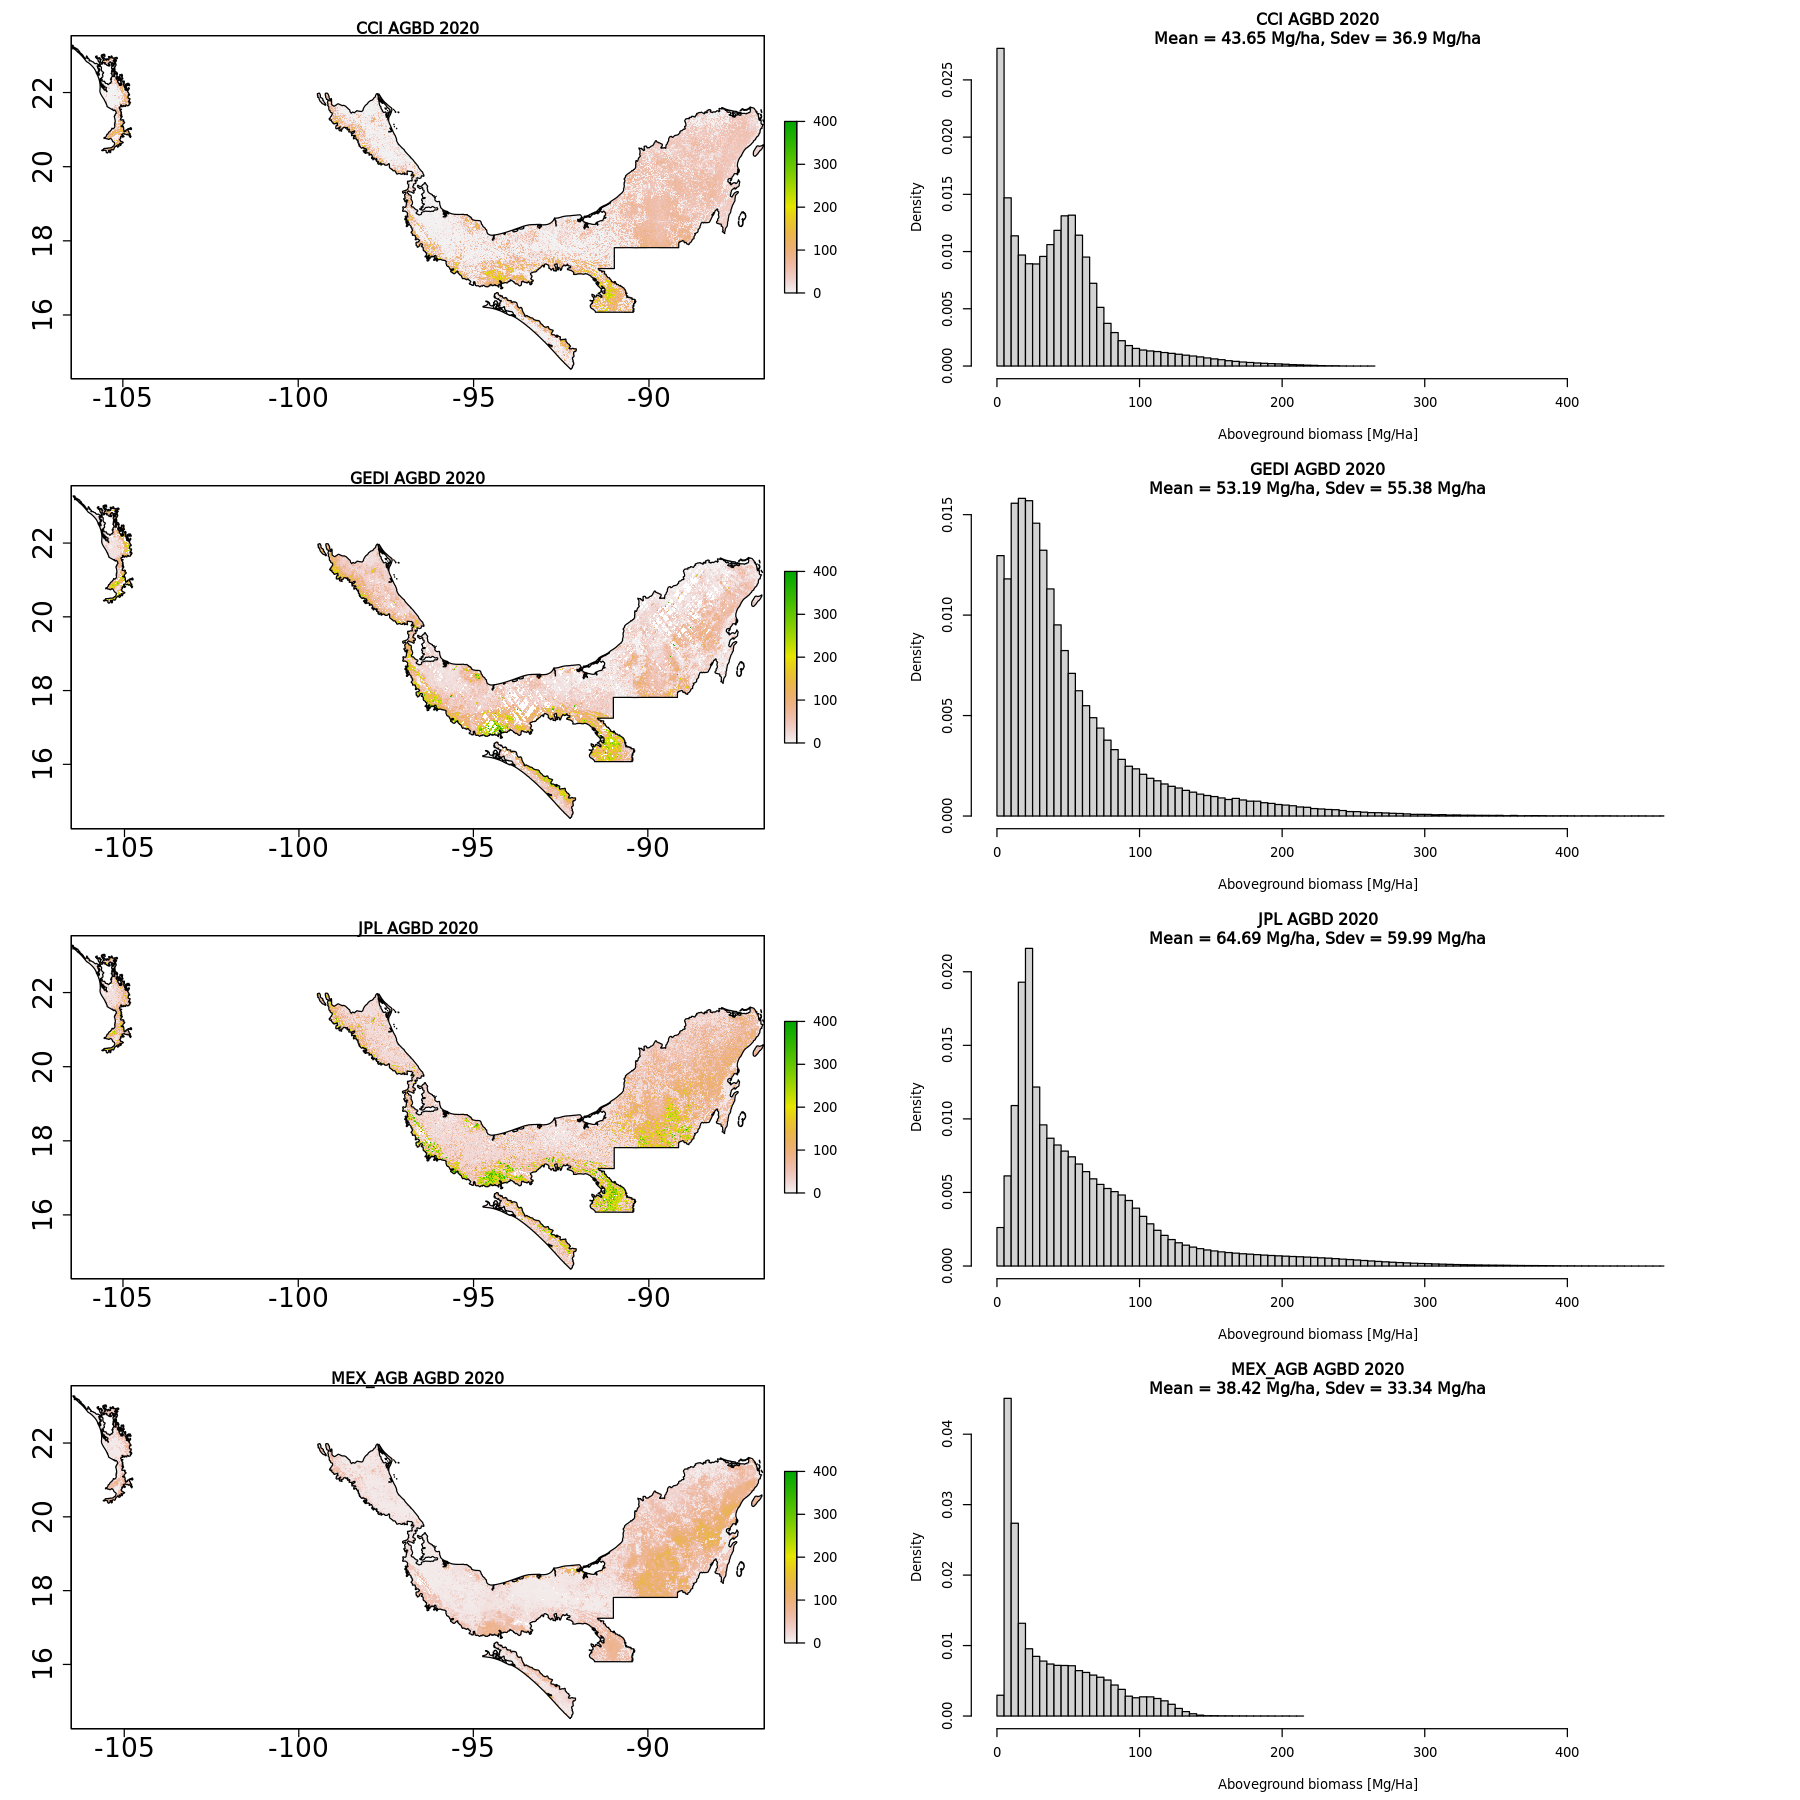

In [18]:
Link_maps_AOImasked <- ''
maps_AOImasked <- ''
for (i in 1:length(maps)){
    assign((text = tolower(maps[i])),readAGBmap(AOI_file=AOI_file,aoi=aoi,continent=conti,map=maps[i],In_folder=eval(parse(text=paste0(tolower(maps[i]),'_folder'))),In_year = eval(parse(text=paste0(maps[i],'_year'))),cci_version=CCI_version,Out_folder=Out_folder))
    maps_AOImasked[[length(maps_AOImasked) + 1]] <- paste0(tolower(maps[i]),"_AOImasked")
    Link_maps_AOImasked[[length(Link_maps_AOImasked) + 1]] <- file.path(Out_folder,paste0(iso3,'_Product_AOI'),paste0(maps[i],"_AOImasked.tif"))
    assign((text = paste0(tolower(maps[i]),"_AOImasked")),(mask(eval(parse(text=tolower(maps[i]))), aoi, updatevalue=NA)))
    corrected_values <- eval(parse(text=paste0(tolower(maps[i]),"_AOImasked")))
    corrected_values[corrected_values<0]=0
    if (maps[i] == 'JPL') {corrected_values = corrected_values/10}
    assign((text = paste0(tolower(maps[i]),"_AOImasked")),corrected_values)
    assign((names(eval(parse(text=paste0(tolower(maps[i]),"_AOImasked"))))), c(paste0("agbd_",paste0(maps[i],"_year"))))
    writeRaster(eval(parse(text=paste0(tolower(maps[i]),"_AOImasked"))),file.path(Out_folder,paste0(iso3,'_Product_AOI'),paste0(maps[i],"_AOImasked.tif")) ,datatype="FLT4S", format="GTiff", options=c("BIGTIFF=IF_NEEDED","COMPRESSION=LZW","TILED=YES"), overwrite=TRUE)
    rm(list = c("corrected_values"))
    rm(list = c(tolower(maps[i])))
}
maps_AOImasked <- maps_AOImasked[maps_AOImasked != ""]
Link_maps_AOImasked <- Link_maps_AOImasked[Link_maps_AOImasked != ""]

par(mfrow=c(length(maps),2), mar=c(2,2,1,1))
options(repr.plot.width=15, repr.plot.height=15)
Save_Perc999 <- Percentile_xlim(maps=maps) 
for (i in 1:length(maps)){
    plot(eval(parse(text=paste0(tolower(maps[i]),"_AOImasked"))), main=paste0(maps[i]," AGBD ", eval(parse(text=paste0(maps[i],"_year")))), zlim=c(0,Save_Perc999),cex.lab=2, cex.axis=2); plot(aoi, add=T)
    map_values <- getValues(eval(parse(text=paste0(tolower(maps[i]),"_AOImasked"))))
    map_values <- map_values[map_values > 0]
    assign((text = paste0(tolower(maps[i]),"_AOImeans")),round(mean(map_values, na.rm=TRUE),2))
    for_n_count <- eval(parse(text=paste0(tolower(maps[i]),"_AOImasked")))
    if (BIG_countries == TRUE) {assign((text = paste0(tolower(maps[i]),"_AOImeans_ncount")),length(for_n_count[for_n_count>0]))}
    if (!all(is.na(map_values))) {
        hist(map_values, freq=F,breaks=seq(0,round(max(map_values,na.rm=T),digits=-1)+5,5),main=paste0(maps[i]," AGBD ", eval(parse(text=paste0(maps[i],"_year"))),'\n',paste("Mean = ",round(mean(map_values, na.rm=TRUE),2),sep=""),paste(" Mg/ha, Sdev = ",round(sd(map_values, na.rm=TRUE),2)," Mg/ha",sep="")),cex.lab=1, cex.axis=1, xlab="Aboveground biomass [Mg/Ha]", xlim=c(0,Save_Perc999+50))#, ylim=c(0,0.025)
    } else {plot(NULL, xlim=c(0,1), ylim=c(0,1), ylab="y label", xlab="x lablel",main=paste0(maps[i]," AGBD ", eval(parse(text=paste0(maps[i],"_year"))),": No values"))}
    rm(list = c("map_values","for_n_count"))
}

In [19]:
if (is.element('None', forest_mask)){MAPS_READY <- Link_maps_AOImasked}

### SUMMARY ###

In [20]:
for (i in 1:length(maps_AOImasked)) {assign((text = paste0(tolower(maps[i]),"_table")),agbd_table(year=eval(parse(text=paste0(maps[i],"_year"))), agb_thresholded=eval(parse(text=maps_AOImasked[i])), agb_masked=eval(parse(text=maps_AOImasked[i]))))}  

Data appears to be in latitude/longitude. Calculating cell areas on a sphere.

Data appears to be in latitude/longitude. Calculating cell areas on a sphere.

Data appears to be in latitude/longitude. Calculating cell areas on a sphere.

Data appears to be in latitude/longitude. Calculating cell areas on a sphere.



In [22]:
aoi_area <- area(aoi)/10^6 ##km2
print('----------------------------------------------------------------------------------------')
print(paste("Region name:", Country_list$Country[Country_list$CODE == iso3], sep=" "))
print(paste("Region area:", round(aoi_area, digits=2), "km2", sep=" "))
print('----------------------------------------------------------------------------------------')
for (i in 1:length(maps_AOImasked)) {
    current_table <- eval(parse(text=paste0(tolower(maps[i]),"_table")))
    forest2020_agb <- current_table[current_table[,"year"]==eval(parse(text=paste0(maps[i],"_year"))),"agb"]/10^9  ##petagram
    if (maps[i] != 'GEDI') {print(paste("Total", maps[i] ,"forest biomass ", eval(parse(text=paste0(maps[i],"_year"))) ,":", round(forest2020_agb, digits=2), "Pg", sep=" "))}
    print(paste("Mean", maps[i] ,"forest biomass density ", eval(parse(text=paste0(maps[i],"_year"))) ,":", toString(eval(parse(text=paste0(tolower(maps[i]),"_AOImeans")))), "Mg/ha", sep=" "))
    if (maps[i] != 'GEDI') {print(paste("Total", maps[i] ,"forest biomass ", eval(parse(text=paste0(maps[i],"_year"))) , "Pg", sep=" "))}
    print('-------------------------------')
}

readme_file <- file.path(Out_folder,paste0(iso3,"_SUMMARY.txt"))
sink(readme_file)
cat('----------------------------------------------------------------------------------------', file=readme_file)
cat("\n", file=readme_file, append=TRUE)
cat(paste("Region name:", aoi@data$SOVEREIGNT, sep=" "), file=readme_file, append=TRUE)
cat("\n", file=readme_file, append=TRUE)
cat(paste("Region area:", round(aoi_area, digits=2), "km2", sep=" "), file=readme_file, append=TRUE)
cat("\n", file=readme_file, append=TRUE)
cat('----------------------------------------------------------------------------------------', file=readme_file, append=TRUE)
cat("\n", file=readme_file, append=TRUE)
for (i in 1:length(maps_AOImasked)) {
    current_table <- eval(parse(text=paste0(tolower(maps[i]),"_table")))
    forest2020_agb <- current_table[current_table[,"year"]==eval(parse(text=paste0(maps[i],"_year"))),"agb"]#/10^9  ##petagram
    if (BIG_countries == TRUE) {
        forest2020_agb <- current_table[current_table[,"year"]==eval(parse(text=paste0(maps[i],"_year"))),"agb"]#/10^9  ##petagram
    }
    if (maps[i] == 'JPL' & eval(parse(text=paste0(maps[i],"_year")))=='2020') {
        cat("NOTE: The JPL 2020 AGB map is a provisional unpublished product", file=readme_file, append=TRUE)
        cat("\n", file=readme_file, append=TRUE)
    }
    if (maps[i] == 'CCI' & eval(parse(text=paste0(maps[i],"_year")))=='2023') {
        cat("NOTE: The CCI 2020 AGB map is a provisional unpublished product", file=readme_file, append=TRUE)
        cat("\n", file=readme_file, append=TRUE)
    }
    if (maps[i] != 'GEDI') {
        cat(paste("Total", maps[i] ,"forest biomass ", eval(parse(text=paste0(maps[i],"_year"))) ,":", round(forest2020_agb, digits=2), "Pg", sep=" "), file=readme_file, append=TRUE)
        assign((text = paste0(tolower(maps[i]),"_Total")),round(forest2020_agb, digits=2))
        cat("\n", file=readme_file, append=TRUE)
    }
    cat(paste("Mean", maps[i] ,"forest biomass density ", eval(parse(text=paste0(maps[i],"_year"))) ,":", toString(eval(parse(text=paste0(tolower(maps[i]),"_AOImeans")))), "Mg/ha", sep=" "), file=readme_file, append=TRUE)
    assign((text = paste0(tolower(maps[i]),"_Mean")),toString(eval(parse(text=paste0(tolower(maps[i]),"_AOImeans")))))
    if (BIG_countries == TRUE) {assign((text = paste0(tolower(maps[i]),"_Ncount")),toString(eval(parse(text=paste0(tolower(maps[i]),"_AOImeans_ncount")))))}
    cat("\n", file=readme_file, append=TRUE)
    cat('-------------------------------', file=readme_file, append=TRUE)
    cat("\n", file=readme_file, append=TRUE)
}
sink()

[1] "----------------------------------------------------------------------------------------"
[1] "Region name: Selvas Calido Humedas"
[1] "Region area: 277254.42 km2"
[1] "----------------------------------------------------------------------------------------"
[1] "Total CCI forest biomass  2020 : 1 Pg"
[1] "Mean CCI forest biomass density  2020 : 43.65 Mg/ha"
[1] "Total CCI forest biomass  2020 Pg"
[1] "-------------------------------"
[1] "Mean GEDI forest biomass density  2020 : 53.19 Mg/ha"
[1] "-------------------------------"
[1] "Total JPL forest biomass  2020 : 1.77 Pg"
[1] "Mean JPL forest biomass density  2020 : 64.69 Mg/ha"
[1] "Total JPL forest biomass  2020 Pg"
[1] "-------------------------------"
[1] "Total MEX_AGB forest biomass  2020 : 1.06 Pg"
[1] "Mean MEX_AGB forest biomass density  2020 : 38.42 Mg/ha"
[1] "Total MEX_AGB forest biomass  2020 Pg"
[1] "-------------------------------"
